## A model of HIV with two risk groups

In [1]:
library(deSolve)
library(simecol)
library(reshape2)

In [2]:
hivmodel.dr <- new("odeModel",
  main = function(time, init, parms, ...){
    with(as.list(c(init,parms)),{
      # ODEs
      N1 <- S1+I1
      N2 <- S2+I2
      dS1 <- lambd1-beta*c1*p11*(I1/N1)*S1-beta*c1*p12*(I2/N2)*S1-mu*S1
      dI1 <- beta*c1*p11*(I1/N1)*S1+beta*c1*p12*(I2/N2)*S1-gamma*I1-mu*I1
      dS2 <- lambd2-beta*c2*p21*(I1/N1)*S2-beta*c2*p22*(I2/N2)*S2-mu*S2
      dI2 <- beta*c2*p21*(I1/N1)*S2+beta*c2*p22*(I2/N2)*S2-gamma*I2-mu*I2
      list(c(dS1,dI1,dS2,dI2))
    })},
    parms = list(p11=0.1,p12=0.9,p21=0.1,p22=0.9,beta=0.01,c1=1,c2=1,gamma=1./520,mu=1./(70*52),lambd1=1000./(70*52),lambd2=9000./(70*52)),
    times = c(from=0,to=40*52,by=1),
    init = c(S1=999,I1=1,S2=9000,I2=0),
    solver = "lsoda"
)

In [3]:
calcprop <- function(c1,c2,N1,N2){
  bigc <- c1*N1+c2*N2
  c(p11=c1*N1/bigc,p12=c2*N2/bigc,p21=c1*N1/bigc,p22=c2*N2/bigc)
}

In [4]:
calcpref <- function(c1,c2,N1,N2,rho1,rho2){
  p11 <- rho1+(1-rho1)*(c1*(1-rho1)*N1)/(c1*(1-rho1)*N1+c2*(1-rho2)*N2)
  p22 <- rho2+(1-rho2)*(c2*(1-rho2)*N2)/(c1*(1-rho1)*N1+c2*(1-rho2)*N2)
  p12 <- (1-rho1)*(c2*(1-rho2)*N2)/(c1*(1-rho1)*N1+c2*(1-rho2)*N2)
  p21 <- (1-rho2)*(c1*(1-rho1)*N1)/(c1*(1-rho1)*N1+c2*(1-rho2)*N2)
  c(p11=p11,p12=p12,p21=p21,p22=p22)
}

In [5]:
# Preferential mixing
dr.pref.p <- calcpref(2,1,10000,90000,0.9,0.9)
dr.pref.co.par <- as.list(c(dr.pref.p,c(beta=0.01,c1=2,c2=1,gamma=1./520,mu=1./(70*52),lambd1=10000./(70*52),lambd2=90000./(70*52))))
dr.pref.sim <- hivmodel.dr
parms(dr.pref.sim) <- dr.pref.co.par

In [6]:
dr.pref.sim <- sim(dr.pref.sim)
dr.pref.out <- out(dr.pref.sim)

In [7]:
# Turn output into 'long' format
dr.pref.out.long <- melt(as.data.frame(dr.pref.out),"time")

### Visualisation

In [8]:
library(ggplot2)

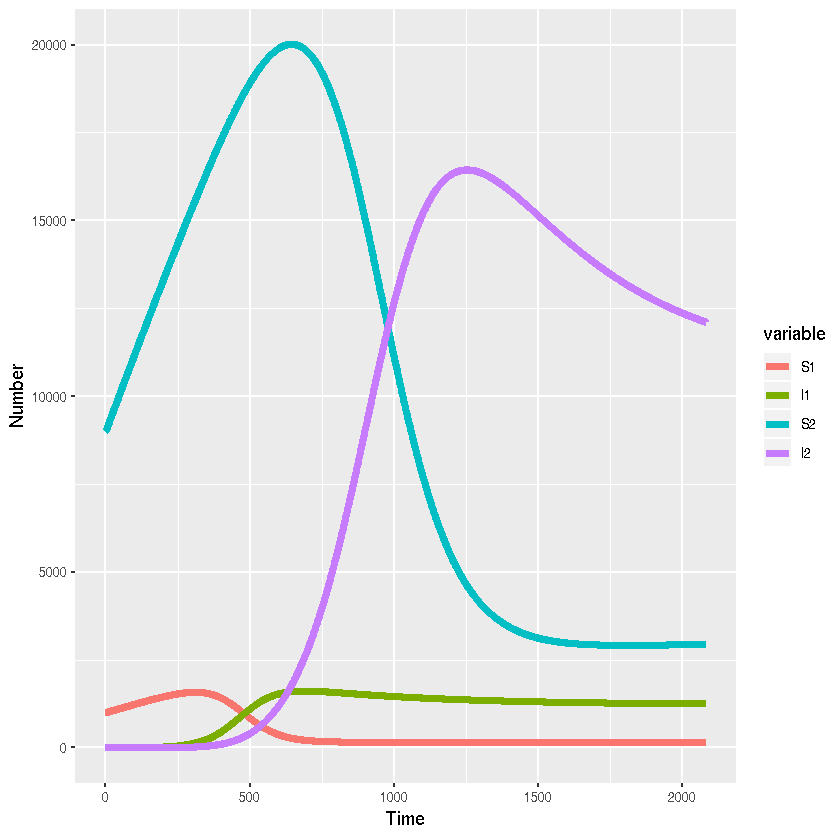

In [9]:
ggplot(dr.pref.out.long,aes(x=time,y=value,colour=variable,group=variable))+
  # Add line
  geom_line(lwd=2)+
  #Add labels
  xlab("Time")+ylab("Number")